In [1]:
import os, sys
sys.path.append(os.path.join('/home/ring/sumo-svn/', 'tools'))
import traci
import traci.constants as tc
import numpy as np
from sumolib import checkBinary
import datetime
import matplotlib
import matplotlib.pyplot as plt
import torch
import copy
import csv
import pandas as pd

In [2]:
# decision_threshold
threshold = {'ONNUT_FP0_END_FLOW' : 20,
'ONNUT_FP2_END_FLOW' :  5,
'ONNUT_FP0_TP2_UNJAM' : 150}
duration={ 'ONNUT_FP0_END_MAXGREEN' : 90,
'ONNUT_FP2_END_MAXGREEN' : 60}

In [3]:
namelane_csv = pd.read_csv('namelane_ONNUT.csv')
namelane_df = pd.DataFrame(namelane_csv, columns = ['name' , 'id'])
NAME = namelane_df.set_index('name')
ID = namelane_df.set_index('id')

In [4]:
ONNUT_EB = [NAME.loc['ONNUT_EB_0_0_LSXX','id']]
ONNUT_NB = [NAME.loc['ONNUT_NB_0_0_LSXX','id'],NAME.loc['ONNUT_NB_0_1_XSXX','id'],NAME.loc['ONNUT_NB_0_2_XSXX','id'],NAME.loc['ONNUT_NB_1_0_LSXX','id'],NAME.loc['ONNUT_NB_1_1_XSXX','id'],NAME.loc['ONNUT_NB_1_2_XSXX','id'],NAME.loc['ONNUT_NB_2_0_XSXX','id'],NAME.loc['ONNUT_NB_2_1_XSXX','id'],NAME.loc['ONNUT_NB_2_2_XSXX','id']]
ONNUT_SB = [NAME.loc['ONNUT_SB_0_0_LSXX','id'],NAME.loc['ONNUT_SB_0_1_XSXX','id'],NAME.loc['ONNUT_SB_0_2_XSXX','id'],NAME.loc['ONNUT_SB_0_3_XSXX','id'],NAME.loc['ONNUT_SB_1_0_LSXX','id'],NAME.loc['ONNUT_SB_1_1_XSXX','id'],NAME.loc['ONNUT_SB_1_2_XSXX','id'],NAME.loc['ONNUT_SB_1_3_XSXX','id'],NAME.loc['ONNUT_SB_2_0_LSXX','id'],NAME.loc['ONNUT_SB_2_1_XSXX','id'],NAME.loc['ONNUT_SB_2_2_XSXX','id'],NAME.loc['ONNUT_SB_2_3_XSXX','id'],NAME.loc['ONNUT_SB_3_0_LSXX','id'],NAME.loc['ONNUT_SB_3_1_XSXX','id'],NAME.loc['ONNUT_SB_3_2_XSXX','id'],NAME.loc['ONNUT_SB_3_3_XSXX','id'],NAME.loc['ONNUT_SB_4_0_XSXX','id'],NAME.loc['ONNUT_SB_4_1_XSXX','id'],NAME.loc['ONNUT_SB_4_2_XSXX','id']]
ONNUT_WB = [NAME.loc['ONNUT_WB_0_0_LSXX','id'],NAME.loc['ONNUT_WB_0_1_XSXX','id'],NAME.loc['ONNUT_WB_0_2_XSRX','id'],NAME.loc['ONNUT_WB_1_0_XSXX','id'],NAME.loc['ONNUT_WB_1_1_XSXX','id'],NAME.loc['ONNUT_WB_1_2_XSRT','id'],NAME.loc['ONNUT_WB_2_0_XSXX','id'],NAME.loc['ONNUT_WB_2_1_XSRT','id']]

In [5]:
#reset the environment
def start():
    sumoBinary = checkBinary('sumo')
    traci.start([sumoBinary, "-c", "Onnut/onnut.sumocfg",
                             "--tripinfo-output", "tripinfo.xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1'])

In [6]:
id = {'Onnut': 'cluster_1088409501_272206263_5136790697_70702637'}
number_phase = [2]
# detecters = {'QA' : ['156261350#0'], 'QB' : ['-453962283#3'], 'QC' : ['459551209#0', '459551209#3'], 'QD' : ['27702347#0', '27702347#4', '27702347#6']}

In [7]:
Onnut_edge = {'WB' : ['156591171#2', '156591171#0', '-824456409#0'], 
         'SB': ['824116560#3' ,'824116560#1', '824116560#0', '824816455'],
         'NB': ['751454884#3']}
OnnutArea_edge = [Onnut_edge]

In [8]:
Onnut_detector_id = {'WB': [['156591171#2_0', '156591171#2_1', '156591171#2_2'], ['156591171#0_0', '156591171#0_1', '156591171#0_2'], ['-824456409#0_0', '-824456409#0_1']], 
 'SB': [['824116560#3_0', '824116560#3_1', '824116560#3_2', '824116560#3_3'], ['824116560#1_0', '824116560#1_1', '824116560#1_2', '824116560#1_3'], ['824116560#0_0', '824116560#0_1', '824116560#0_2', '824116560#0_3'], ['824816455_0', '824816455_1', '824816455_2']], 
 'NB': [['751454884#3_0', '751454884#3_1', '751454884#3_2']]}
OnnutArea_detector_id = [Onnut_detector_id]

In [9]:
# import traci
# import lxml.etree as ET
# def get_Onnut_id():
#     ==
# Function  get_Onnut_id 
# input = name of edge in onnut area (OnnutArea_edge)
# returns outputs = id of all detectors in onnut area
#     ==
#     tree = ET.parse('Onnut/detectors_01.add.xml')
#     additionals = tree.getroot()
#     for junction in OnnutArea_edge:
# #         print(junction)
#         for key in junction.keys():
#             detectors_id = []
# #             print(key)
#             for detectors in junction[key]:
# #                 print(detectors)
#                 detector_id = []
#                 for e2Detector in additionals:
#                     detector = e2Detector.attrib
#                     if 'id' in detector.keys():
#                         if detectors == detector['id'][:-2]:
#                             detector_id.append(detector['id'])
#                 detectors_id.append(detector_id)
#             junction[key] = detectors_id
#     for junction in OnnutArea_edge:
#         print(junction)
#     return 
# get_Onnut_id()

In [10]:
def get_detector_id(list_detector):
#     ==
# Function get_detector_id takes inputs, namely, 

# list_detector = list of edge name of detectors ex. ['824116555#0-AddedOffRampEdge', '824116555#0']

# and returns outputs, namely,

# detector_id = list of id of detectors

#     ==
    detector_id = []
    for j in range(len(OnnutArea_edge)):
        for key in OnnutArea_edge[j].keys():
            detectors_id = []
#             print(key)
            for i in range(len(OnnutArea_edge[j][key])):
                for d in list_detector:
                    if d == OnnutArea_edge[j][key][i]:
#                         print(Onnut_detector_id [j][key][i])
                        detector_id += OnnutArea_detector_id [j][key][i]
#                 print(detector_id)
    return detector_id
# get_detector_id(['824116555#0-AddedOffRampEdge', '824116555#0'])

In [11]:
def get_occupancy_average_percent(detector_id): #get_occupancy_average
    occupancy = sum([traci.lanearea.getLastStepOccupancy(e) for e in detector_id])/len(detector_id)
    return occupancy

In [12]:
def get_flow_sum(detector_id):
    # return number of vehicles on detector_id during last time step
    #https://sumo.dlr.de/docs/TraCI/Lane_Area_Detector_Value_Retrieval.html
    flow = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
    return flow

In [13]:
def get_mean_speed(detector_id):
    mean_speed = sum([traci.lanearea.getLastStepMeanSpeed(e) for e in detector_id])/len(detector_id)

In [14]:
def get_unjamlength_meters(detector_id): 
    detector_length = sum(traci.lanearea.getLength(d) for d in detector_id)
    unjamlength = detector_length - (sum([traci.lanearea.getJamLengthMeters(e) for e in detector_id])) #/detector_length
    return unjamlength

In [15]:
junction_name = list(id.keys()) 
def take_action(new_selected_traffic_signal_phases):
#     ==
# Function take_action takes inputs, namely, 

# new_selected_traffic_signal_phases[even indec] = current phase of traffic light signal from previous decision time step
# new_selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interruption would occur

# and returns outputs, namely,

# JamLengthMeter = sum of jam length in detectors area
# Speed = sum of speed of all vehicles in detectors area
#     ==
    change_to_phase = new_selected_traffic_signal_phases[0::2]
#     print(change_to_phase)
    current_phase = [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    for i in range(len(current_phase)):
        if change_to_phase[i] != current_phase[i]:
            yellow = (change_to_phase[i]-1)%(2*number_phase[i])
#             print(yellow)
#             print(junction_name[i])
            traci.trafficlight.setPhase(id[junction_name[i]], yellow) #  YELLOW PHASE 
        else:
            traci.trafficlight.setPhase(id[junction_name[i]], change_to_phase[i]) # No YELLOW PHASE 
    for i in range(5):
        traci.simulationStep()
#     w1 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
#     w2 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
    JamLengthMeter = sum([traci.lanearea.getJamLengthMeters(detector) for i in range (len(OnnutArea_detector_id)) for B in OnnutArea_detector_id[i].keys() for detectors in OnnutArea_detector_id[i][B] for detector in detectors])
#     reward = -w2*(1-w) - w1*(w)
#     state, len_state = get_state()
    Speed = sum([traci.lanearea.getLastStepMeanSpeed(detector) for i in range (len(OnnutArea_detector_id)) for B in OnnutArea_detector_id[i].keys() for detectors in OnnutArea_detector_id[i][B] for detector in detectors])
    reward = JamLengthMeter, Speed
    return reward

In [16]:
def find_action(selected_traffic_signal_phases,greentime_duration, threshold, duration): 
#     ==
# Function traffic_police_action takes inputs, namely, 

# selected_traffic_signal_phases[even index] = current phase of traffic light signal from previous decision time step
# selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interruption would occur
# greentime_duration = number of seconds that current phase of traffic light signal has been used
# max_greentime_duration = maximum allowable number of seconds for current phase of traffic light signal

# and returns outputs, namely,

# new_selected_traffic_signal_phases = new value of selected_traffic_signal_phases[0] and selected_traffic_signal_phases[1] (defined above) to be deployed till next decision time step
# new_greentime_duration = new value of greentime_duration to be deployed till next decision time step
#     ==
    #Onnut
    current_phase = selected_traffic_signal_phases[0]
    next_phase_ifno_interupt = selected_traffic_signal_phases[1]
#     print('get_flow_sum(get_detector_id(Onnut_edge[WB]))', get_flow_sum(get_detector_id(Onnut_edge['WB'])))
#     print('get_flow_sum(get_detector_id(Onnut_edge[SB]))', get_flow_sum(get_detector_id(Onnut_edge['SB'])))
#     print('unjamlength_meters Onnut_edge WB', get_unjamlength_meters(get_detector_id(Onnut_edge['WB'])))
#     print('occupancy Onnut_edge SB', get_occupancy_average_percent(get_detector_id(Onnut_edge['SB'])))
    if current_phase == 0:
        if (get_flow_sum(ONNUT_SB) <= threshold['ONNUT_FP0_END_FLOW']) or (greentime_duration >= duration['ONNUT_FP0_END_MAXGREEN'] ): 
              current_phase = 2
        if get_unjamlength_meters(ONNUT_SB) <= threshold['ONNUT_FP0_TP2_UNJAM'] :
              current_phase = 2
    elif current_phase == 2: #***
        if get_flow_sum(ONNUT_WB) <= threshold['ONNUT_FP2_END_FLOW'] or greentime_duration >= duration['ONNUT_FP2_END_MAXGREEN']:
              current_phase = 0
    if selected_traffic_signal_phases[0] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    Onnut_phase = current_phase
    next_Onnut_phase_ifno_interupt = next_phase_ifno_interupt
    new_selected_traffic_signal_phases = [Onnut_phase, next_Onnut_phase_ifno_interupt]
    new_greentime_duration = greentime_duration
#     action = [ KlongTei_phase, None, Rama4_phase,  next_Rama4_phase, 0, None, 0, None, 0, None, 0, None]
    return new_selected_traffic_signal_phases, new_greentime_duration

In [17]:
reward_memory = []
def plot_durations():
    print('show')
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(reward_memory, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated

In [18]:
def episode0(threshold, duration):
    #episode = 0
    reward_memory = []
    JamLengthMeter_memory = []
    Speed_memory = []
    greentime_duration = 0
    start()
    traci.simulationStep()
    selected_traffic_signal_phases = [0, None]
    for seconds in range(100): #2880
#         state, len_state = get_state() #minimum_remaining_time = Q-lengthเมตร/free flow speed
        new_selected_traffic_signal_phases, new_greentime_duration = find_action(selected_traffic_signal_phases,
            greentime_duration, threshold, duration)
#         print(action)
#         print(count)
        JamLengthMeter, Speed = take_action(new_selected_traffic_signal_phases)
        JamLengthMeter_memory.append(JamLengthMeter)
        Speed_memory.append(Speed)
        print(JamLengthMeter)
#         print(Speed)
#         print(state)
        selected_traffic_signal_phases = new_selected_traffic_signal_phases
        greentime_duration = new_greentime_duration 
#     with open('output.csv', mode='w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerow(['JamLengthMeter'])
#         writer.writerows(JamLengthMeter_memory)
    plt.figure(2)
    plt.clf() 
    line_up, = plt.plot(JamLengthMeter_memory)
    line_down, = plt.plot(Speed_memory)
    plt.legend([line_up, line_down], ['JamLengthMeter', 'Speed'])
    plt.pause(0.001)
    traci.close()

In [19]:
# traci.close()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
0.0
0.0
5.0
0.0
20.0
10.0
12.59527965681221
5.0
12.60907213705292
20.185418019560515
12.778223580461372
20.185838807670862
34.236823039595755
27.724944328420065
42.02136325323426
25.19488929113642
47.411065786543105
103.9659934259481
100.31527491212375
89.8528716669713
103.61582650743247
114.31576551851481
96.7973017421159
78.95804236560997
74.02258633334547
82.87054697096218
115.17303885291845
128.43153033897124
132.4959151034455
197.78957143018698
201.07028300205627
233.10674472885486
183.83469910351147
135.5112052818642
210.63857747037164
197.51715510604726
87.47097619550661
81.55403385294359
89.25156349662286
149.81405676781623
212.51439345258368
273.8273658623769
257.843246934458
287.34198067005485
305.2379584934869
255.98762153812862
150.61707711057645
85.71182470373063
60.95026299801216
202.8969188818869
200.6348446046823
161.52213846776263
139.3625420706505
209.6579740185784
173.40707698442048
172.5953335972115

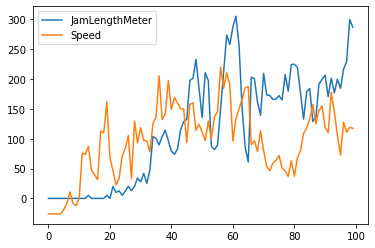

In [20]:
episode0(threshold, duration) #PEAM